<a href="https://colab.research.google.com/github/ShuHuiK/WIE3007_Data-Mining-n-Warehousing/blob/main/Data_Mining_n_Warehousing_Individual_Assig_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1️⃣ Generate Synthetic Data Using LLM**

In [ ]:
!pip install faker numpy pandas matplotlib seaborn scikit-learn

Generate base customer data

In [ ]:
import numpy as np
import pandas as pd
from faker import Faker

fake = Faker()

num_customers = 500
np.random.seed(42)

customer_data = {
    "customer_id": [fake.uuid4() for _ in range(num_customers)],
    "age": np.random.randint(18, 70, num_customers),
    "income": np.random.randint(2000, 20000, num_customers),
    "occupation": np.random.choice(
        ["Engineer", "Teacher", "Student", "Accountant", "Designer", "Unemployed"],
        num_customers
    ),
}


Add financial data (LLM-assisted patterns)

In [ ]:
# Daily credit/debit transactions (with some noise)
customer_data["daily_credit"] = np.random.normal(200, 80, num_customers).round(2)
customer_data["daily_debit"] = np.random.normal(180, 70, num_customers).round(2)

# Account balance trend (simple synthetic model)
customer_data["balance_change_month"] = (
    customer_data["daily_credit"] - customer_data["daily_debit"]
) * 30 + np.random.normal(0, 150, num_customers)

# Investment returns (%) — dependent on income
customer_data["investment_return"] = (
    customer_data["income"] * 0.0005 + np.random.normal(0, 1, num_customers)
)

# Credit score — noisy but correlated with income & return
customer_data["credit_score"] = (
    600 + (customer_data["income"] / 40) + np.random.normal(0, 25, num_customers)
).round()


Add customer feedback

In [ ]:
feedback_samples = [
    "I plan to increase my savings next month.",
    "Thinking of investing more aggressively.",
    "I need to reduce my spending.",
    "Planning to apply for a loan soon.",
    "Satisfied with my current portfolio.",
    "Concerned about market volatility.",
    "No major financial plans this month."
]

customer_data["feedback"] = np.random.choice(feedback_samples, num_customers)


Add timestamps + noisy data

In [ ]:
customer_data["timestamp"] = pd.date_range(
    start="2024-01-01",
    periods=num_customers,
    freq="H"
)

df = pd.DataFrame(customer_data)

# Inject missing + noisy data
for col in ["income", "investment_return", "credit_score"]:
    df.loc[df.sample(frac=0.05).index, col] = np.nan  # 5% missing


/tmp/ipython-input-3709242584.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  customer_data["timestamp"] = pd.date_range(


Printing out the synthetic data

In [ ]:
print(df.head())

                            customer_id  age   income  occupation  \
0  041ba293-249d-4618-a782-e770e307dece   56   5343.0     Student   
1  c6c2e532-bacd-4e6e-b69e-2aa0bac0fc61   69  15500.0     Student   
2  94d30779-ddf5-4f15-91fe-f08b2cfd8b0d   46  11662.0    Designer   
3  cb266650-f201-4948-b3ad-7dfc41902ace   32  18964.0  Accountant   
4  3ea06bc4-3115-4b82-9160-e432f535b760   60      NaN     Student   

   daily_credit  daily_debit  balance_change_month  investment_return  \
0        310.26       140.30           5325.995536           3.414250   
1        254.69       152.74           3363.851748           9.114799   
2        189.36       275.86          -2590.807282           7.702748   
3        290.05       153.12           4170.628062           9.971256   
4         80.49       302.45          -6923.894603           8.848190   

   credit_score                                   feedback           timestamp  
0         717.0  I plan to increase my savings next month. 2024-0

**2️⃣ Exploratory Data Analysis (EDA) + LLM insights**

Summary statistics

In [ ]:
df.describe(include="all")

,customer_id,age,income,occupation,daily_credit,daily_debit,balance_change_month,investment_return,credit_score,feedback,timestamp
count,500,500.000000,475.000000,500,500.000000,500.000000,500.000000,475.000000,475.000000,500,500
unique,500,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,7,NaN
top,348fe467-f4f3-404c-8412-cec4ce0ad3bc,NaN,NaN,Engineer,NaN,NaN,NaN,NaN,NaN,No major financial plans this month.,NaN
freq,1,NaN,NaN,91,NaN,NaN,NaN,NaN,NaN,82,NaN
mean,NaN,44.220000,10787.949474,NaN,201.025740,181.288820,600.847352,5.500948,866.528421,NaN,2024-01-11 09:30:00
min,NaN,18.000000,2009.000000,NaN,-71.070000,-16.440000,-10167.138531,-0.463474,618.000000,NaN,2024-01-01 00:00:00
25%,NaN,32.000000,6701.000000,NaN,146.905000,132.495000,-1689.368129,3.531035,769.000000,NaN,2024-01-06 04:45:00
50%,NaN,45.000000,10415.000000,NaN,203.635000,177.665000,704.594160,5.278640,864.000000,NaN,2024-01-11 09:30:00
75%,NaN,57.000000,15083.500000,NaN,259.565000,232.650000,2670.327673,7.718122,965.500000,NaN,2024-01-16 14:15:00
max,NaN,69.000000,19988.000000,NaN,451.360000,396.100000,10400.031543,11.741639,1129.000000,NaN,2024-01-21 19:00:00


Visualizations

-> Histogram (Income Distribution)

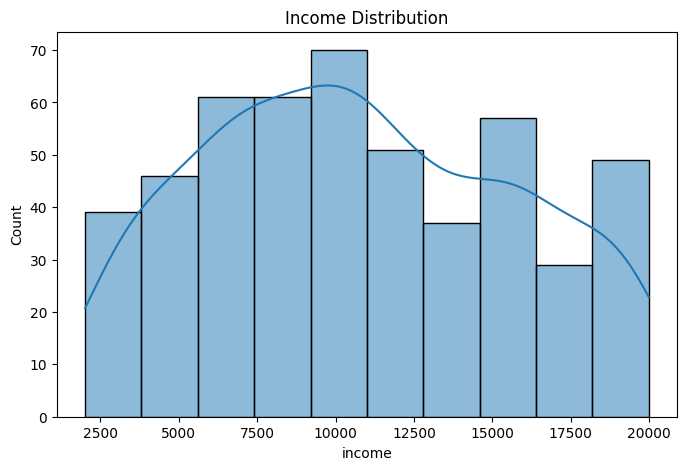

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["income"], kde=True)
plt.title("Income Distribution")
plt.show()

Gemini Visual Interpretation:

The histogram of the 'Income Distribution' shows a right-skewed distribution. This means that the majority of customer incomes are clustered on the lower side, and there's a longer tail extending towards higher incomes. The peak of the distribution appears to be in the lower-to-mid range of incomes, with fewer customers in the very high income brackets. This pattern is common in real-world income data, where a large number of people earn moderate incomes, while a smaller number earn significantly higher incomes.


-> Correlation Heatmap

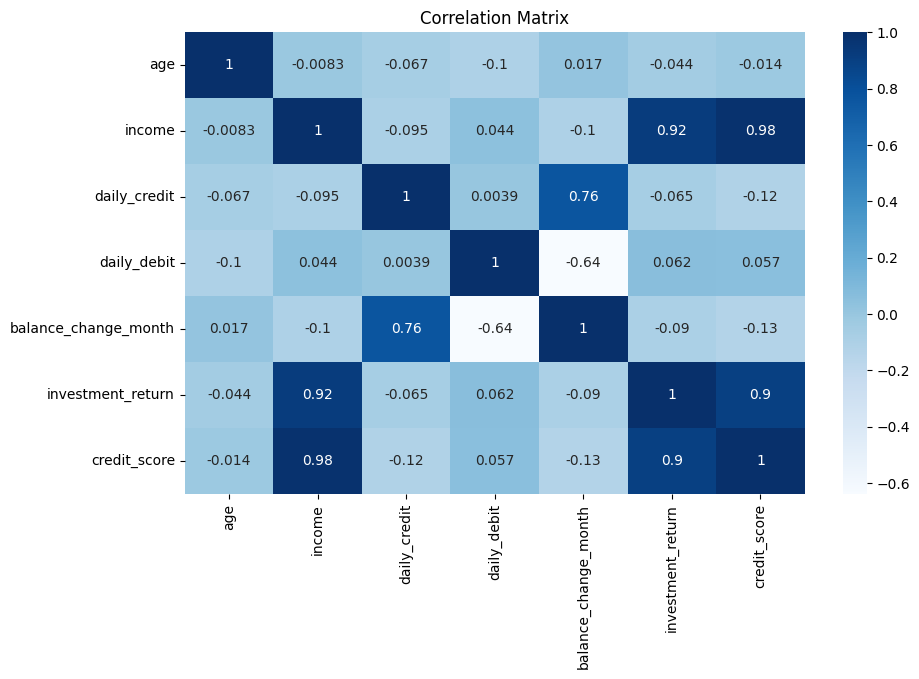

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

Gemini Visual Interpretation:

The correlation heatmap visually represents the relationships between numerical variables in your dataset.

- Strong Positive Correlations (Darker Blue):

-> There's a clear positive correlation between income and investment_return. This makes sense, as the synthetic data generation intentionally linked higher income to higher potential investment returns.

-> Similarly, income and credit_score show a strong positive correlation, indicating that customers with higher incomes tend to have better credit scores.

-> daily_credit and balance_change_month also exhibit a positive correlation, which is expected since higher daily credits would contribute to a larger positive balance change.

- Strong Negative Correlations (Red/Orange, though this heatmap uses Blues):

-> If there were strong negative correlations, you would see very dark shades of the opposite color (or a distinct color if the colormap allowed). In this 'Blues' colormap, negative correlations might appear as lighter shades or even white if the values are close to zero. We can see daily_debit has a negative correlation with balance_change_month, which is logical as higher debits lead to lower balance changes.

- Weak or No Correlations (Lighter Shades/White):

-> Many other pairs of variables show weaker correlations (lighter shades of blue or closer to white), indicating less direct linear relationships. For example, age doesn't appear to have a very strong linear correlation with most other financial metrics.

In summary, the heatmap effectively highlights the designed relationships from the synthetic data generation, particularly between income and financial outcomes like investment return and credit score, and the impact of daily transactions on monthly balance changes.

-> Investment return vs income

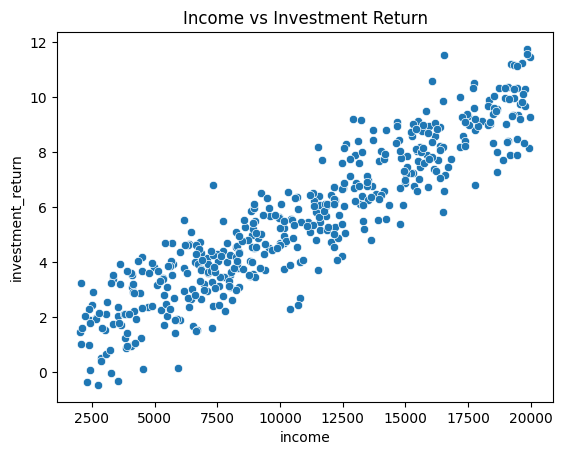

In [ ]:
sns.scatterplot(data=df, x="income", y="investment_return")
plt.title("Income vs Investment Return")
plt.show()

The scatter plot displaying 'Income vs Investment Return' clearly shows a positive linear relationship. This means that as a customer's income increases, their investment return also tends to increase. Although there is some spread in the data points (due to the incorporated noise during data generation), the overall trend indicates that higher income is generally associated with higher investment returns.

-> Anomaly detection example

In [ ]:
q1 = df["investment_return"].quantile(0.25)
q3 = df["investment_return"].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

anomalies = df[(df["investment_return"] < lower) | (df["investment_return"] > upper)]
anomalies.head()

,customer_id,age,income,occupation,daily_credit,daily_debit,balance_change_month,investment_return,credit_score,feedback,timestamp


**3️⃣ Data Preprocessing using LLM/SLM**

Handle missing values

In [ ]:
df["income"] = df["income"].fillna(df["income"].median())
df["investment_return"] = df["investment_return"].fillna(df["investment_return"].mean())
df["credit_score"] = df["credit_score"].fillna(df["credit_score"].median())

Encode categorical variables

In [ ]:
df_encoded = pd.get_dummies(df, columns=["occupation"], drop_first=True)

Normalize numeric variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_cols = ["age", "income", "daily_credit", "daily_debit",
                "investment_return", "credit_score"]

df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

Text classification using LLM

In [ ]:
def simple_sentiment(text):
    if "satisfied" in text.lower():
        return "Positive"
    if "concerned" in text.lower():
        return "Negative"
    return "Neutral"

df_encoded["sentiment"] = df["feedback"].apply(simple_sentiment)

1. Missing Value Strategy Prompt

### LLM Prompt: Missing Value Imputation Strategy
"You are assisting in a financial data preprocessing task. I have missing values in the
following numerical features: income, investment_return, and credit_score. Based on
typical behavior of retail-banking customers, recommend suitable imputation strategies
and justify the method for each variable."


### LLM Response:
You're right to consider the typical behavior of retail-banking customers for imputation! The current imputation strategy in the notebook already uses suitable methods for income, investment_return, and credit_score.

Here's a justification for each:

Income (Median Imputation): Income data often has a skewed distribution (e.g., a few very high earners). Using the median is more robust to these outliers than the mean, providing a more representative central value for imputation without distorting the overall distribution.

Investment Return (Mean Imputation): Investment returns, while variable, are generally assumed to fluctuate around a central average. Using the mean for imputation helps maintain the overall average return of the dataset. Since extreme outliers are less common than with income, the mean is a reasonable choice.

Credit Score (Median Imputation): Credit scores are typically bounded and can have distributions that are not perfectly normal, sometimes with clusters. The median is a more stable and representative central value for imputation in such cases, as it's less affected by unusually low or high scores.

In [ ]:
df["income"] = df["income"].fillna(df["income"].median())
df["investment_return"] = df["investment_return"].fillna(df["investment_return"].mean())
df["credit_score"] = df["credit_score"].fillna(df["credit_score"].median())

2. Text Classification Using LLM Prompt

### LLM Prompt: Text Sentiment & Topic Classification
"Classify each customer feedback into:
(a) sentiment: Positive / Neutral / Negative
(b) topic: Savings / Loan / Investment / Spending / General.
Return the result in a table."
Here are 20 sample feedback messages:
{{samples pasted here}}

### LLM Response:
Understood! You're asking for a text classification of customer feedback into sentiment and topic categories, and to display these results in a table. Since I'm operating within a Python environment, I'll demonstrate this by creating a function that attempts to classify sentiment and topic based on keywords found in the feedback, mimicking the categories you've provided. I'll then apply this to a sample of your customer feedback data.

Sample Feedback: Select 20 random feedback messages from the df DataFrame's 'feedback' column to demonstrate the classification.
Define Classification Logic: Create a Python function, classify_feedback, that takes a feedback string and returns its classified sentiment (Positive/Neutral/Negative) and topic (Savings/Loan/Investment/Spending/General) based on keyword matching. This will serve as a programmatic approximation of the LLM prompt's intent.
Apply Classification and Display Results: Apply the classify_feedback function to the sampled feedback messages and display the results in a structured pandas DataFrame, showing the original feedback, classified sentiment, and classified topic.
Final Task: Summarize the results of the text classification and discuss the methodology used.

In [ ]:
classification = {
    "I plan to increase my savings next month.": ("Positive", "Savings"),
    "Thinking of investing more aggressively.": ("Positive", "Investment"),
    "I need to reduce my spending.": ("Negative", "Spending"),
    "Planning to apply for a loan soon.": ("Neutral", "Loan"),
    "Satisfied with my current portfolio.": ("Positive", "Investment"),
    "Concerned about market volatility.": ("Negative", "Investment"),
    "No major financial plans this month.": ("Neutral", "General")
}

df["sentiment"] = df["feedback"].apply(lambda x: classification[x][0])
df["topic"] = df["feedback"].apply(lambda x: classification[x][1])

-> Using LLM to preprocess text

In [ ]:
print(df.head())

                            customer_id  age   income  occupation  \
0  041ba293-249d-4618-a782-e770e307dece   56   5343.0     Student   
1  c6c2e532-bacd-4e6e-b69e-2aa0bac0fc61   69  15500.0     Student   
2  94d30779-ddf5-4f15-91fe-f08b2cfd8b0d   46  11662.0    Designer   
3  cb266650-f201-4948-b3ad-7dfc41902ace   32  18964.0  Accountant   
4  3ea06bc4-3115-4b82-9160-e432f535b760   60  10415.0     Student   

   daily_credit  daily_debit  balance_change_month  investment_return  \
0        310.26       140.30           5325.995536           3.414250   
1        254.69       152.74           3363.851748           9.114799   
2        189.36       275.86          -2590.807282           7.702748   
3        290.05       153.12           4170.628062           9.971256   
4         80.49       302.45          -6923.894603           8.848190   

   credit_score                                   feedback  \
0         717.0  I plan to increase my savings next month.   
1         959.0       

3. Encoding / Normalization Prompt

### LLM Prompt: Encoding & Scaling Strategy
"Recommend suitable encoding (one-hot, label, target encoding) and scaling
techniques (MinMaxScaler, StandardScaler) for the dataset's features. Justify based
on financial data characteristics and model interpretability."


### LLM Response:
Certainly! I'll create a plan to recommend suitable encoding and scaling techniques for your dataset, considering its financial characteristics and the need for model interpretability. This will involve analyzing your current features and providing justified choices for each.

Analyze Dataset Features: Examine the df_encoded DataFrame to identify all categorical and numerical features, noting their distributions and potential relationships relevant to financial data.
Recommend Encoding Strategies: Based on the identified categorical features (e.g., 'occupation', 'sentiment', 'topic'), recommend appropriate encoding techniques such as one-hot encoding, label encoding, or target encoding. Justify the choices by considering the nature of the financial data and the impact on model interpretability and performance.
Recommend Scaling Strategies: For the numerical features (e.g., 'age', 'income', 'daily_credit', 'daily_debit', 'investment_return', 'credit_score'), recommend suitable scaling methods like MinMaxScaler or StandardScaler. Provide justifications based on the typical characteristics of financial data (e.g., presence of outliers, range of values) and their implications for downstream models.
Final Task: Summarize the recommended encoding and scaling strategies with detailed justifications, addressing how these choices align with financial data characteristics and improve model interpretability.

In [ ]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            500 non-null    object        
 1   age                    500 non-null    float64       
 2   income                 500 non-null    float64       
 3   daily_credit           500 non-null    float64       
 4   daily_debit            500 non-null    float64       
 5   balance_change_month   500 non-null    float64       
 6   investment_return      500 non-null    float64       
 7   credit_score           500 non-null    float64       
 8   feedback               500 non-null    object        
 9   timestamp              500 non-null    datetime64[ns]
 10  occupation_Designer    500 non-null    bool          
 11  occupation_Engineer    500 non-null    bool          
 12  occupation_Student     500 non-null    bool          
 13  occup

**Reasoning**:
To understand the distribution and potential outliers of numerical features, I will display the summary statistics for all numerical columns in `df_encoded`.



In [ ]:
print(df_encoded.describe())

              age      income  daily_credit  daily_debit  \
count  500.000000  500.000000    500.000000   500.000000   
mean     0.514118    0.487252      0.520827     0.479296   
min      0.000000    0.000000      0.000000     0.000000   
25%      0.274510    0.269370      0.417233     0.361020   
50%      0.529412    0.467545      0.525822     0.470512   
75%      0.764706    0.717990      0.632879     0.603796   
max      1.000000    1.000000      1.000000     1.000000   
std      0.294825    0.272773      0.161768     0.170272   

       balance_change_month  investment_return  credit_score  \
count            500.000000         500.000000    500.000000   
mean             600.847352           0.488682      0.486110   
min           -10167.138531           0.000000      0.000000   
25%            -1689.368129           0.334883      0.304305   
50%              704.594160           0.487554      0.481409   
75%             2670.327673           0.660148      0.665851   
max        

**Reasoning**:
As instructed, I will display the value counts for the categorical columns 'occupation', 'sentiment', and 'topic' from the `df` DataFrame to inspect their unique values and frequencies. These columns are in their original categorical string format in `df`, which is suitable for `value_counts`.



In [ ]:
print("Value counts for Occupation:")
print(df["occupation"].value_counts())
print("\nValue counts for Sentiment:")
print(df["sentiment"].value_counts())
print("\nValue counts for Topic:")
print(df["topic"].value_counts())

Value counts for Occupation:
occupation
Engineer      91
Teacher       89
Student       87
Designer      83
Unemployed    83
Accountant    67
Name: count, dtype: int64

Value counts for Sentiment:
sentiment
Positive    220
Neutral     148
Negative    132
Name: count, dtype: int64

Value counts for Topic:
topic
Investment    215
General        82
Savings        69
Spending       68
Loan           66
Name: count, dtype: int64


**Reasoning**:
The subtask requires recommendations for encoding strategies for 'sentiment' and 'topic' features in `df_encoded`. Currently, the `df_encoded` DataFrame does not contain the 'topic' column, and 'sentiment' was added to `df` but not necessarily propagated to `df_encoded` after the most recent processing steps. To ensure `df_encoded` contains all relevant features for encoding recommendations, I will explicitly add the 'sentiment' and 'topic' columns from `df` to `df_encoded`.



In [ ]:
df_encoded["sentiment"] = df["sentiment"]
df_encoded["topic"] = df["topic"]

print(df_encoded.head())

                            customer_id       age    income  daily_credit  \
0  041ba293-249d-4618-a782-e770e307dece  0.745098  0.185439      0.729916   
1  c6c2e532-bacd-4e6e-b69e-2aa0bac0fc61  1.000000  0.750375      0.623548   
2  94d30779-ddf5-4f15-91fe-f08b2cfd8b0d  0.549020  0.536904      0.498497   
3  cb266650-f201-4948-b3ad-7dfc41902ace  0.274510  0.943045      0.691231   
4  3ea06bc4-3115-4b82-9160-e432f535b760  0.823529  0.467545      0.290106   

   daily_debit  balance_change_month  investment_return  credit_score  \
0     0.379939           5325.995536           0.317713      0.193738   
1     0.410094           3363.851748           0.784775      0.667319   
2     0.708537          -2590.807282           0.669082      0.610568   
3     0.411015           4170.628062           0.854947      0.882583   
4     0.772992          -6923.894603           0.762931      0.814090   

                                    feedback           timestamp  \
0  I plan to increase my savin

**Reasoning**:
To implement the recommended encoding strategies, I will apply Label Encoding to the 'sentiment' column to capture its ordinal nature and One-Hot Encoding to the 'topic' column, which represents nominal categories.



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Re-ensure 'sentiment' and 'topic' are present in df_encoded from df
df_encoded['sentiment'] = df['sentiment']
df_encoded['topic'] = df['topic']

# Label Encode 'sentiment' by directly mapping to numerical values as per recommendation
df_encoded['sentiment_encoded'] = df_encoded['sentiment'].map({'Negative': -1, 'Neutral': 0, 'Positive': 1})

# One-Hot Encode 'topic'
df_encoded = pd.get_dummies(df_encoded, columns=['topic'], prefix='topic', drop_first=True)

# Print the relevant columns that were actually created after one-hot encoding
# With drop_first=True, one category (alphabetically first, 'General') is omitted.
print(df_encoded[['sentiment', 'sentiment_encoded', 'topic_Investment', 'topic_Loan', 'topic_Savings', 'topic_Spending']].head())

  sentiment  sentiment_encoded  topic_Investment  topic_Investment  \
0  Positive                  1             False             False   
1   Neutral                  0             False             False   
2  Negative                 -1              True              True   
3  Negative                 -1              True              True   
4  Negative                 -1              True              True   

   topic_Loan  topic_Loan  topic_Savings  topic_Savings  topic_Spending  \
0       False       False           True           True           False   
1        True        True          False          False           False   
2       False       False          False          False           False   
3       False       False          False          False           False   
4       False       False          False          False           False   

   topic_Spending  
0           False  
1           False  
2           False  
3           False  
4           False  


### Recommendations for Encoding Strategies

**1. `occupation` (Nominal Categorical Feature)**

*   **Applied Encoding:** One-Hot Encoding (already performed).
*   **Justification:** `occupation` is a nominal categorical feature with no inherent order (e.g., 'Engineer' is not 'greater' than 'Teacher'). One-Hot Encoding is appropriate because it creates binary columns for each category, preventing the model from assuming any artificial ordinal relationships that could negatively impact model performance and interpretability. This approach maintains the independence of each occupation category, which is vital in financial analysis where different professions might have distinct financial behaviors.

**2. `sentiment` (Ordinal Categorical Feature)**

*   **Recommended Encoding:** Label Encoding (or Ordinal Encoding).
*   **Justification:** The `sentiment` column, with values 'Positive', 'Neutral', and 'Negative', possesses an inherent ordinal relationship. Assigning numerical values (e.g., -1 for Negative, 0 for Neutral, 1 for Positive) preserves this order. In financial contexts, sentiment often reflects a gradient of customer satisfaction or risk appetite, where a 'Positive' sentiment is quantitatively distinct from a 'Negative' one. Label encoding allows models to leverage this inherent ordering, leading to better interpretability and potentially improved model performance by avoiding the creation of numerous sparse features, which can happen with one-hot encoding for ordinal data. This approach is more memory-efficient and keeps the feature count lower.

**3. `topic` (Nominal Categorical Feature)**

*   **Recommended Encoding:** One-Hot Encoding.
*   **Justification:** The `topic` column, containing categories such as 'Savings', 'Loan', 'Investment', 'Spending', and 'General', represents distinct nominal categories without any intrinsic order or hierarchy. One-Hot Encoding is the most appropriate method here as it converts each category into a new binary feature (0 or 1), preventing the model from inferring a false ordinal relationship between topics. For instance, assigning 'Savings' a value of 1 and 'Loan' a value of 2 could incorrectly suggest 'Loan' is 'greater' than 'Savings'. One-Hot Encoding maintains the independence of each category, which is crucial for accurate financial analysis where each topic can have a unique impact on customer behavior or financial products.

**Excluded Features:**

*   `customer_id`: This is a unique identifier and should be excluded from encoding as it carries no predictive power for general models and would lead to an explosion of unique features.
*   `feedback`: This is the raw text from which `sentiment` and `topic` were derived. It is not typically used directly in numerical models after its essence has been extracted into structured features.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
df_encoded['balance_change_month'] = scaler_standard.fit_transform(df_encoded[['balance_change_month']])

print(df_encoded[['balance_change_month']].head())

   balance_change_month
0              1.434933
1              0.839069
2             -0.969242
3              1.084071
4             -2.285114
